TASK 1

DON
TPA
NIC

TASK 2

You have some dataset describing concentrations of five algae metabolites. For each algae there is
a species name, its genus and its group.
 Using pandas library find the average concentration of each of the metabolite in each aglae
genus.
 Visualize the result using seaborn library.

In [ ]:
import pandas as pd
import seaborn as sns

In [3]:
df = pd.read_csv("~/Downloads/data_for_task2.csv")

In [30]:
df.head()

,species,genus,group,sucrose,alanin,citrate,glucose,oleic_acid
0,Fucus_vesiculosus,Fucus,brown,3.001472,3.711498,5.004262,2.548459,6.405165
1,Saccharina_japonica,Saccharina,brown,6.731070,1.255251,5.621499,6.013219,4.156700
2,Fucus_serratus,Fucus,brown,3.276870,0.346431,1.216767,3.623225,0.304573
3,Fucus_distichus,Fucus,brown,6.786996,6.641303,6.423606,2.272724,3.393203
4,Cladophora_fracta,Cladophora,green,3.861470,1.648450,6.940588,2.316955,2.528886


In [31]:
df2 = df.groupby('genus') \
    .aggregate({'sucrose': 'mean', 'alanin': 'mean', 'citrate': 'mean', 'glucose': 'mean', 'oleic_acid': 'mean'})
df2

,sucrose,alanin,citrate,glucose,oleic_acid
genus,,,,,
Ascophyllum,6.825467,0.875429,5.253527,3.414961,2.432526
Cladophora,4.008792,3.997055,5.288311,2.800276,2.263472
Fucus,4.355112,3.566411,4.214878,2.814803,3.367647
Palmaria,0.704580,3.176440,5.573905,3.242090,2.245538
Saccharina,4.183596,3.524207,3.346710,4.980594,4.487252


In [50]:
df2['genus'] = df2.index #.rename(columns = {'genus':'genera'})

In [53]:
df3 = pd.melt(
    frame = df2,
    id_vars = "genus")

In [54]:
df3

,genus,variable,value
0,Ascophyllum,sucrose,6.825467
1,Cladophora,sucrose,4.008792
2,Fucus,sucrose,4.355112
3,Palmaria,sucrose,0.704580
4,Saccharina,sucrose,4.183596
5,Ascophyllum,alanin,0.875429
6,Cladophora,alanin,3.997055
7,Fucus,alanin,3.566411
8,Palmaria,alanin,3.176440
9,Saccharina,alanin,3.524207


[Text(0, 0, 'Ascophyllum'),
 Text(1, 0, 'Cladophora'),
 Text(2, 0, 'Fucus'),
 Text(3, 0, 'Palmaria'),
 Text(4, 0, 'Saccharina')]

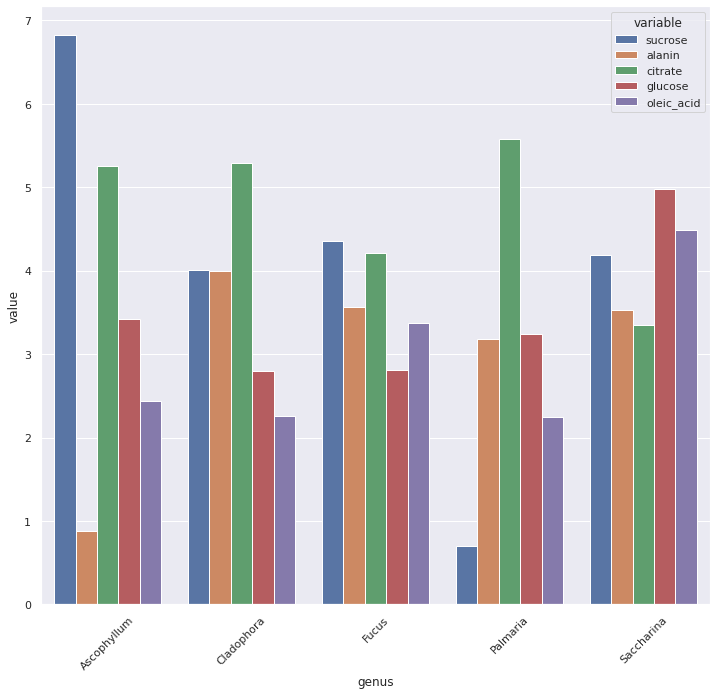

In [57]:
sns.set(rc={'figure.figsize':(12,11)})

g = sns.barplot(x="genus",
                y="value", 
                hue="variable", 
                data = df3)

# with readable x labels
g.set_xticklabels(g.get_xticklabels(),
                  rotation=45)

TASK 3

You have noticed that map() function returns something different than list. Simply saying, it returns
iterator. In this connection, we used list(map(...)) syntax but remember that iterators in some
cases are more preferable than lists.
This task is devoted to understanding (repeating) how iterators work.
 First create iterator via my_iter = map(lambda ...) construction that takes [1,2,3,4,5,6] and
returns True if there is no remainder after division of the list’s element on 3 and returns False
otherwise.
 In infinite loop proceed the iterator using the next() function on it. Observe the appearing
error in this loop.
 Write except block catching this particular (!) error.
 Based on this usecase try to understand (remember) in which cases iterators might be more
preferable than lists and write down your thoughts.

In [85]:
my_iter = map(lambda x: x%3==0, [1,2,3,4,5,6])

In [83]:
my_iter = map(lambda x: x%3==0, [1,2,3,4,5,6])

while True:
    print(next(my_iter))

False
False
True
False
False
True


StopIteration: 

In [88]:
my_iter = map(lambda x: x%3==0, [1,2,3,4,5,6])

for i in range(10):
    try:
        print(next(my_iter))
    except StopIteration:
        print('exceeded')

False
False
True
False
False
True
exceeded
exceeded
exceeded
exceeded


iterators might be more preferable than lists in cases when:
    1) we don't need all the elements at once, so we could take only the next element, thus, spending less memory 
    2) we could create infinite loops with help of iterators and try/except blocks



TASK 4

In this task you need to use API of numbersapi.com site.
You are given a set of numbers: 22, 43, 264, 1990. For each of the numbers, you need to find out if
there is an interesting mathematical or historical fact about it. The answer should contain these facts
marked as “MATH:” or “HIST:”.

In [100]:
import requests

In [164]:
typ='math'
for number in [22, 43, 264, 1990]:
    URL = f"http://numbersapi.com/{number}/{typ}"
    # URL
    result = requests.get(URL)
    if result.ok:
        print('MATH:', result.text)

typ='date'
for number in [22, 43, 264, 1990]:
    URL = f"http://numbersapi.com/{number}/{typ}"
    # URL
    result = requests.get(URL)
    if result.ok:
        print('HIST:', result.text)

MATH: 22 is an even composite number, its proper divisors being 1, 2 and 11.
MATH: 43 is a centered heptagonal number.
MATH: 264 is the largest known number whose square is undulating.
MATH: 1990 is a stella octangula number.
HIST: January 22nd is the day in 1863 that the January Uprising breaks out in Poland, Lithuania and Belarus.
HIST: February 12th is the day in 1961 that U.S.S.R. launches Venera 1 towards Venus.
HIST: September 20th is the day in 1961 that Greek general Konstantinos Dovas becomes Prime Minister of Greece.
HIST: June 12th is the day in 1994 that the Boeing 777, the world's largest twinjet, makes its first flight.


TASK 5

Explore cobra’s preloaded core metabolism model of E.coli:
from cobra import test
model = test.create_test_model("textbook") # Name: e_coli_core
Knock out gene b3236 and write down what has changed in NADH production in cytosol.

In [2]:
from cobra import test
model = test.create_test_model("textbook") # Name: e_coli_core

In [4]:
getattr(model.genes, "b3236").knock_out() #b3236.knock_out()
model.optimize()
model.metabolites.nadh_c.summary(fva=0.95)

Percent,Flux,Range,Reaction,Definition
0.00%,0,[-1.513; 0],ACALD,acald_c + coa_c + nad_c <=> accoa_c + h_c + nadh_c
18.46%,7.449,[0; 8.076],AKGDH,akg_c + coa_c + nad_c --> co2_c + nadh_c + succoa_c
0.00%,0,[-1.242; 0],ALCD2x,etoh_c + nad_c <=> acald_c + h_c + nadh_c
7.26%,2.929,[2.783; 2.929],Biomass_Ecoli_core,1.496 3pg_c + 3.7478 accoa_c + 59.81 atp_c + 0.361 e4p_c + 0.0709 f6p_c + 0.129 g3p_c + 0.205 g6p_c + 0.2557 gln__L_c + 4.9414 glu__L_c + 59.81 h2o_c + 3.547 nad_c + 13.0279 nadph_c + 1.7867 oaa_c + 0.5191 pep_c + 2.8328 pyr_c + 0.8977 r5p_c --> 59.81 adp_c + 4.1182 akg_c + 3.7478 coa_c + 59.81 h_c + 3.547 nadh_c + 13.0279 nadp_c + 59.81 pi_c
44.12%,17.8,[9.838; 17.91],GAPD,g3p_c + nad_c + pi_c <=> 13dpg_c + h_c + nadh_c
0.00%,0,[-1.188; 0],LDH_D,lac__D_c + nad_c <=> h_c + nadh_c + pyr_c
1.83%,0.738,[0; 11.9],ME1,mal__L_c + nad_c --> co2_c + nadh_c + pyr_c
0.00%,0,[0; 44.63],NADTRHD,nad_c + nadph_c --> nadh_c + nadp_c
28.34%,11.43,[0.5791; 18.69],PDH,coa_c + nad_c + pyr_c --> accoa_c + co2_c + nadh_c
Percent,Flux,Range,Reaction,Definition
